# Imports

In [84]:
# Import the necessary packages to runtime
import scipy.stats as stats
import zipcodes as zcode
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
import statsmodels.api as sm

#SkLearn library
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
from sklearn.model_selection import train_test_split

#AUC ROC Curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve

# To plot confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay 
from sklearn.metrics import plot_confusion_matrix

# Build Model and Decision tree imports
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier 

pd.set_option('display.float_format', lambda x: '%.5f' % x)
pd.set_option('display.max_rows', 300)
pd.set_option('display.max_colwidth', 400)

warnings.filterwarnings('ignore')

plt.style.use('ggplot')

In [85]:
# Read and Understand Data

# Read the CSV file

df = pd.read_csv('Loan_Modelling.csv')
df_loan = df.copy()

# Check the shape of the data frame
df_loan.shape

(5000, 14)

In [86]:
# check the head
df_loan.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.60000,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.50000,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.00000,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.70000,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.00000,2,0,0,0,0,0,1


In [87]:
# check the tail
df_loan.tail()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.90000,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.40000,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.30000,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.50000,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.80000,1,0,0,0,0,1,1


In [88]:
# check the dataframe information
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [89]:
# ID field can be dropped as it seems to be redundant
df_loan.drop(['ID'], axis=1, inplace=True)

# Data Preprocessing

In [90]:
# Convert the categorical columns to category type
category_col = ['Personal_Loan','Securities_Account','Family','CD_Account','Online','CreditCard','ZIPCode','Education']
df_loan[category_col] = df_loan[category_col].astype('category')

In [91]:
# Check the data frame information
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Age                 5000 non-null   int64   
 1   Experience          5000 non-null   int64   
 2   Income              5000 non-null   int64   
 3   ZIPCode             5000 non-null   category
 4   Family              5000 non-null   category
 5   CCAvg               5000 non-null   float64 
 6   Education           5000 non-null   category
 7   Mortgage            5000 non-null   int64   
 8   Personal_Loan       5000 non-null   category
 9   Securities_Account  5000 non-null   category
 10  CD_Account          5000 non-null   category
 11  Online              5000 non-null   category
 12  CreditCard          5000 non-null   category
dtypes: category(8), float64(1), int64(4)
memory usage: 260.1 KB


# Data Analysis

<AxesSubplot:xlabel='Age', ylabel='Density'>

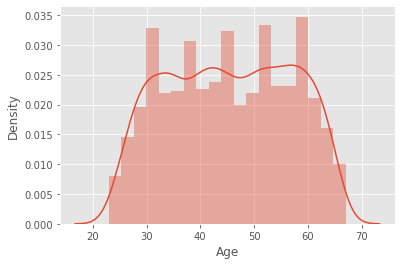

In [92]:
# Dist plot of Age
sns.distplot(df_loan['Age'])

Observation: Age is normally distributed

<AxesSubplot:xlabel='Experience', ylabel='Density'>

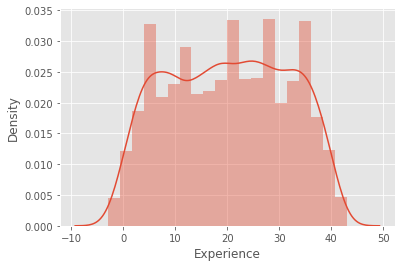

In [93]:
# Dist plot of Experience
sns.distplot(df_loan['Experience'])

Observation: Experience is normally distributed

<AxesSubplot:xlabel='Income', ylabel='Density'>

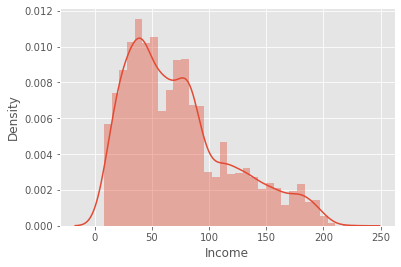

In [94]:
# Dist plot of Income
sns.distplot(df_loan['Income'])

Observation: Income is right skewed distribution

<AxesSubplot:xlabel='CCAvg', ylabel='Density'>

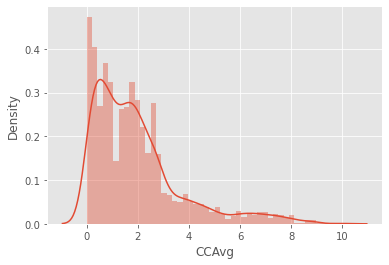

In [95]:
# Dist plot of CCAvg
sns.distplot(df_loan['CCAvg'])

Observation: CCAvg is right skewed distribution

<AxesSubplot:xlabel='Education', ylabel='Density'>

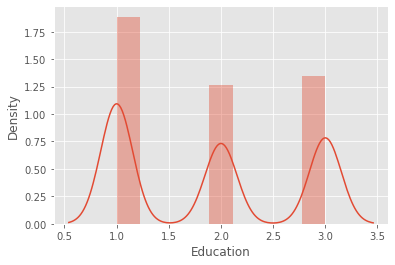

In [96]:
# Dist plot of Education
sns.distplot(df_loan['Education'])

Observation: Undergrad level customers are more than the Graduate and Advanced/Professional customers

<AxesSubplot:xlabel='Mortgage', ylabel='Density'>

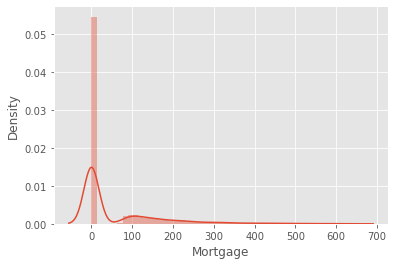

In [97]:
# Dist plot of Mortgage
sns.distplot(df_loan['Mortgage'])

Observation: Mortgage is right skewed, there are more customers whose mortgage is under 150000

<AxesSubplot:xlabel='CreditCard', ylabel='Density'>

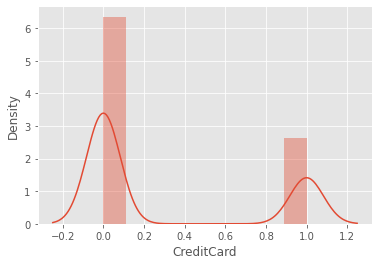

In [98]:
# Dist plot of CreditCard
sns.distplot(df_loan['CreditCard'])

Observation: Number of customers without credit card is double that of customers with credit card

In [99]:
loan_counts = pd.DataFrame(df_loan['Personal_Loan'].value_counts()).reset_index()
loan_counts.columns =["Labels","Personal_Loan"]
loan_counts

,Labels,Personal_Loan
0,0,4520
1,1,480


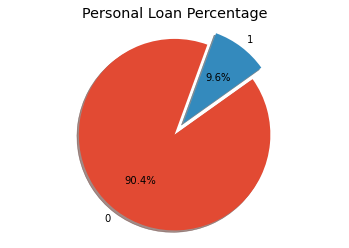

In [100]:
# Pie chart of Personal loan
fig1, ax1 = plt.subplots()
explode = (0, 0.15)
ax1.pie(loan_counts['Personal_Loan'], explode=explode, labels=loan_counts["Labels"], autopct='%1.1f%%',shadow=True, startangle=70)
ax1.axis('equal')
plt.title("Personal Loan Percentage")
plt.show()

Observation: 90.4% of the people don't have a personal loan and only 9.6% has personal loan. We should be building our model towards predicting which customer will NOT be accepting a personal loan

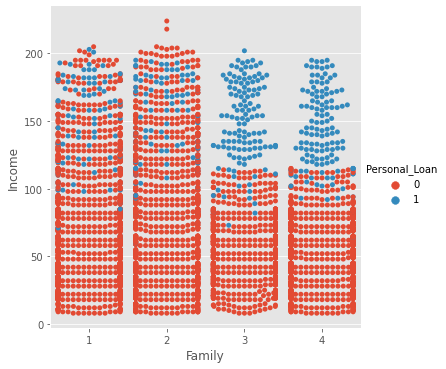

In [101]:
# Category plot - Influence of Family and Income on Personal Loan
sns.catplot(x='Family', y='Income', hue='Personal_Loan', data=df_loan, kind='swarm')

Observation: Families with size 3 or more seem to be taking Personal Loan who also seem to have higher income above 100k and till 200k

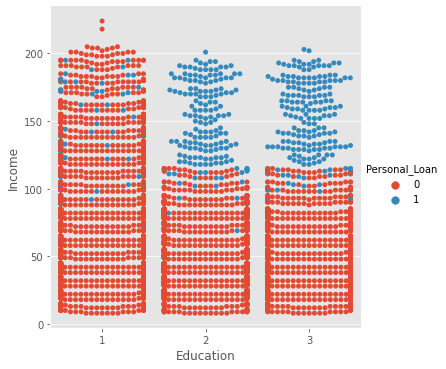

In [102]:
# Influence of Education and Income on Personal Loan
sns.catplot(x='Education', y='Income', hue='Personal_Loan', data=df_loan, kind='swarm')

Observation: Customers who are graduate and above and those with higher paychecks of 100k and above are bound to take personal loan

<AxesSubplot:xlabel='Securities_Account', ylabel='count'>

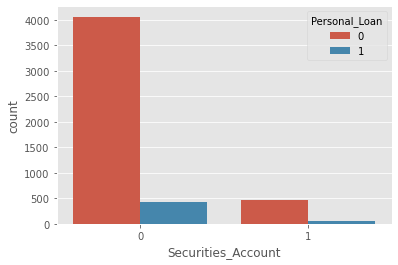

In [103]:
# Influence of Securities Account over Personal Loan
sns.countplot(x="Securities_Account", data=df_loan, hue="Personal_Loan")

Observation: Customers who seem to have securities account have taken a personal loan 

<AxesSubplot:xlabel='Family', ylabel='count'>

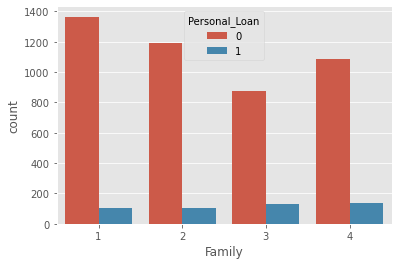

In [104]:
# Influence of Family on Personal Loan
sns.countplot(x='Family', data=df, hue='Personal_Loan')

Observation: Family sizes having 3 or more seem to be having personal loans

<AxesSubplot:xlabel='CD_Account', ylabel='count'>

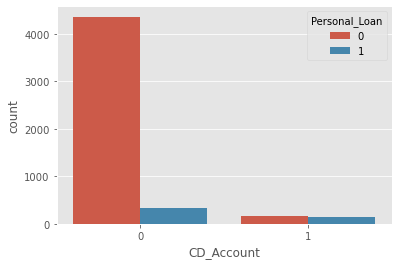

In [105]:
# Influence of CD Account on Personal Loan
sns.countplot(x='CD_Account', data=df, hue='Personal_Loan')

Observation: Customers having CD Account have Personal Loans

Text(0.5, 1.0, 'CCAvg Distribution')

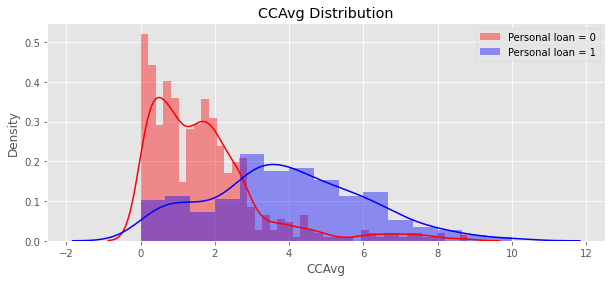

In [106]:
# Influence of CCAvg on Personal Loan
plt.figure(figsize=(10,4))
sns.distplot(df_loan[df_loan['Personal_Loan'] == 0]['CCAvg'], color='r', label='Personal loan = 0')
sns.distplot(df_loan[df_loan['Personal_Loan'] == 1]['CCAvg'], color='b', label='Personal loan = 1')
plt.legend()
plt.title("CCAvg Distribution")

Observation: Customers with high CC usage in a month are more likely to take Personal Loan, also it shows that Customers who have taken personal loan have high credit card average

Text(0.5, 1.0, 'CCAvg Distribution')

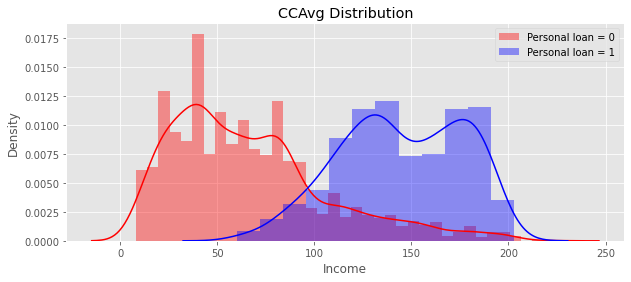

In [107]:
# Influence of Income on Personal Loan
plt.figure(figsize=(10,4))
sns.distplot(df_loan[df_loan['Personal_Loan'] == 0]['Income'], color='r', label='Personal loan = 0')
sns.distplot(df_loan[df_loan['Personal_Loan'] == 1]['Income'], color='b', label='Personal loan = 1')
plt.legend()
plt.title("CCAvg Distribution")

Observation: Customers who have taken Personal loan have more income than those who didnot take. High income is a good case for personal loan prediction

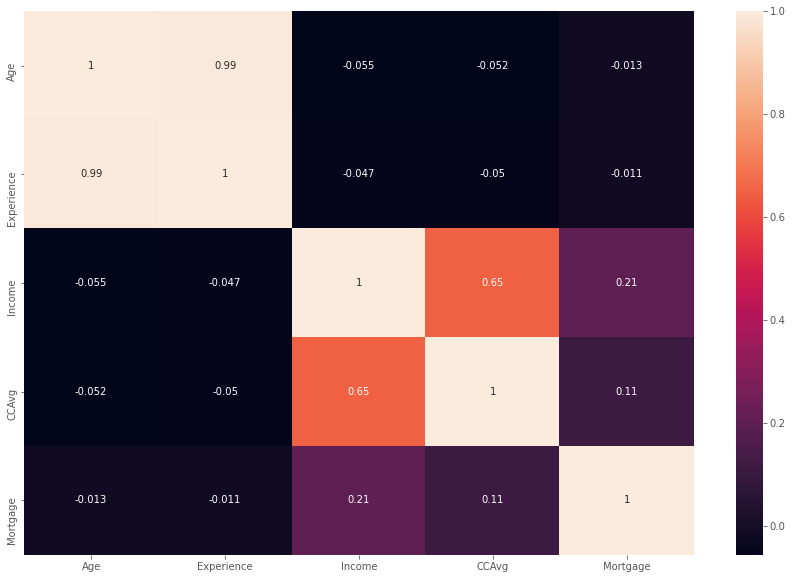

In [108]:
# Correlation
sns.set_palette(sns.color_palette("Set2", 6))
plt.figure(figsize=(15,10))
sns.heatmap(df_loan.corr(),annot=True)
plt.show()

Observation: Age and Experience are highly correlated. Income and Average spending on credit card are positively correlated. Mortgage has very little correlation with income

# Modelling

In [109]:
X = df_loan.drop(['Personal_Loan'], axis=1)
Y = df_loan['Personal_Loan']

oneHotCols=['ZIPCode', 'Education']
X=pd.get_dummies(X, columns=oneHotCols, drop_first=True)

In [110]:
# Split data into train and test sets 
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.30, random_state=1, stratify=Y)

In [111]:
x_train.head()

,Age,Experience,Income,Family,CCAvg,Mortgage,Securities_Account,CD_Account,Online,CreditCard,...,ZIPCode_96003,ZIPCode_96008,ZIPCode_96064,ZIPCode_96091,ZIPCode_96094,ZIPCode_96145,ZIPCode_96150,ZIPCode_96651,Education_2,Education_3
3465,65,41,42,1,1.90000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4582,25,-1,69,3,0.30000,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1922,39,15,25,1,1.40000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1186,62,38,43,4,1.20000,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3718,45,19,8,2,0.10000,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [112]:
# Check the split of data
print("{0:0.2f}% data is in training set".format((len(x_train)/len(df_loan.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(x_test)/len(df_loan.index)) * 100))

70.00% data is in training set
30.00% data is in test set


In [113]:
print("Original Personal Loan True Values    : {0} ({1:0.2f}%)".format(len(df_loan.loc[df_loan['Personal_Loan'] == 1]), (len(df_loan.loc[df_loan['Personal_Loan'] == 1])/len(df_loan.index)) * 100))
print("Original Personal Loan False Values   : {0} ({1:0.2f}%)".format(len(df_loan.loc[df_loan['Personal_Loan'] == 0]), (len(df_loan.loc[df_loan['Personal_Loan'] == 0])/len(df_loan.index)) * 100))
print("")
print("Training Personal Loan True Values    : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train)) * 100))
print("Training Personal Loan False Values   : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train)) * 100))
print("")
print("Test Personal Loan True Values        : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test)) * 100))
print("Test Personal False Values       : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test)) * 100))
print("")

Original Personal Loan True Values    : 480 (9.60%)
Original Personal Loan False Values   : 4520 (90.40%)

Training Personal Loan True Values    : 336 (9.60%)
Training Personal Loan False Values   : 3164 (90.40%)

Test Personal Loan True Values        : 144 (9.60%)
Test Personal False Values       : 1356 (90.40%)



# Logistic Regression

In [114]:
# Fit the model on train
model = LogisticRegression(solver="liblinear", random_state=1)
model.fit(x_train, y_train)
#predict on test
y_predict = model.predict(x_test)


coef_df = pd.DataFrame(model.coef_)
coef_df['intercept'] = model.intercept_
print(coef_df)

         0       1       2       3       4       5        6       7        8  \
0 -0.41632 0.42723 0.05891 0.55515 0.09579 0.00110 -0.75239 2.96562 -0.62344   

         9  ...     469      470      471      472      473      474      475  \
0 -0.84479  ... 0.00092 -0.01139 -0.07656 -0.01929 -0.00026 -0.00001 -0.01380   

      476     477  intercept  
0 3.60488 3.75834   -2.10544  

[1 rows x 479 columns]


In [115]:
model_score = model.score(x_test, y_test)
print(model_score)

0.952


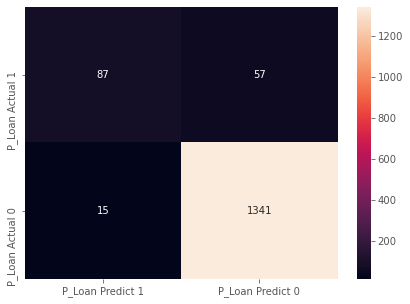

In [134]:
# Print the confusion matrix 
cm=metrics.confusion_matrix(y_test, y_predict, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["P_Loan Actual 1","P_Loan Actual 0"]],
                  columns = [i for i in ["P_Loan Predict 1","P_Loan Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True,fmt='g')
plt.show()

# True Positives : We correctly predicted that 87 people will take Personal Loans

# True Negatives : We correctly predicted that 1341 people will NOT take Personal Loans

# False Positives : We incorrectly predicted that 15 people will take Personal Loans

# False Negatives : We incorrectly predicted that 57 people will NOT take Personal Loans

In [119]:
# Use the DecisionTreeClassifier
model = DecisionTreeClassifier(criterion='gini', class_weight={0:0.15,1:0.85}, random_state=1)
model.fit(x_train, y_train)
ytrain_predict = model.predict(x_train)
ytest_predict = model.predict(x_test)
print("Accuracy :: Train ", model.score(x_train, y_train), " :: Test ", model.score(x_test, y_test))
print("Recall :: Train ", metrics.recall_score(y_train, ytrain_predict), " :: Test ", metrics.recall_score(y_test, ytest_predict))

Accuracy :: Train  1.0  :: Test  0.9733333333333334
Recall :: Train  1.0  :: Test  0.8888888888888888


# Visualizing the Decision Tree

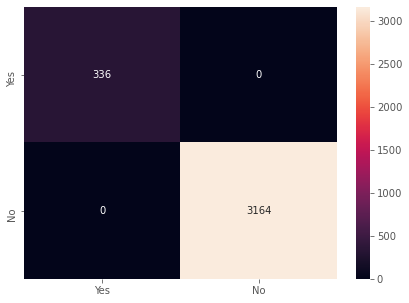

In [122]:
# Confusion Matrix on Train Data
cm_train = metrics.confusion_matrix(y_train, ytrain_predict, labels=[1, 0])

df_cm_train = pd.DataFrame(cm_train, index = [i for i in ["Yes","No"]],
                  columns = [i for i in ["Yes","No"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm_train, annot=True,fmt='g')
plt.show()

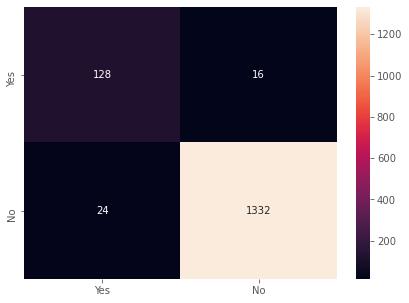

In [123]:
# Confusion Matrix on Test Data
cm_test = metrics.confusion_matrix(y_test, ytest_predict, labels=[1, 0])

df_cm_test = pd.DataFrame(cm_test, index = [i for i in ["Yes","No"]],
                  columns = [i for i in ["Yes","No"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm_test, annot=True,fmt='g')
plt.show()